In [36]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

### 读取原始数据

In [37]:
df_raw = pd.read_csv('D:/BaiduNetdiskDownload/spider_money.csv')
# df_raw.head(30)

In [38]:
df = df_raw.replace(to_replace='--',value=np.nan)
df = df.replace(to_replace='---',value=np.nan)
df.head()

,p_code,p_name,earning,start_date,earn_7d,earn_14d,earn_28d,earn_35d,path_1m,path_3m,path_6m,path_1y,start_money
0,439,国金鑫盈货币,0.0415,01-17,0.1800%,0.21%,0.65%,0.85%,0.06%,0.39%,0.65%,1.80%,100元
1,20031,国泰现金管理货币A,0.2936,01-17,0.9900%,0.86%,1.28%,1.30%,0.11%,0.32%,0.63%,1.85%,100元
2,20032,国泰现金管理货币B,0.3594,01-17,1.2290%,1.10%,1.52%,1.53%,0.13%,0.38%,0.76%,2.10%,500万
3,20007,国泰货币,0.5178,01-17,1.8710%,2.00%,2.02%,1.92%,0.17%,0.53%,1.16%,2.98%,100元
4,738,中信建投货币A,0.4997,01-17,1.8720%,2.18%,2.40%,2.35%,0.20%,0.60%,1.33%,2.86%,100元


In [39]:
df['start_money'] = df['start_money'].map(lambda x:x.rstrip('元') if x.endswith('元') else (x.rstrip('万')+'0000'))

In [40]:
df['earning']=pd.to_numeric(df['earning'])

In [41]:
df['path_1m'] = df['path_1m'].map(lambda x:x.rstrip('%'))

In [42]:
df['path_3m'] = df['path_3m'].map(lambda x:x.rstrip('%'))

In [43]:
df['path_6m'] = df['path_6m'].map(lambda x:x.rstrip('%'))

In [44]:
df['path_1y'] = df['path_1y'].map(lambda x:x.rstrip('%'))

In [45]:
df['start_money'] = df['start_money'].astype('int64')

In [46]:
df.loc[7,['earn_7d']]= '0.00%'

In [47]:
df['earn_7d'] =df['earn_7d'].map(lambda x:x.rstrip('%'))

In [48]:
df.loc[7,['earn_14d']]= '0.00%'
df.loc[7,['earn_28d']]= '0.00%'
df.loc[7,['earn_35d']]= '0.00%'
df['earn_14d'] =df['earn_14d'].map(lambda x:x.rstrip('%'))
df['earn_28d'] =df['earn_28d'].map(lambda x:x.rstrip('%'))
df['earn_35d'] =df['earn_35d'].map(lambda x:x.rstrip('%'))

In [49]:
# df.drop([(7, 'earn_7d')],axis=1,inplace=True)

In [50]:
df.groupby(df['start_money'] == 5000000)['earning'].mean()[1]

0.6930583333333334

In [51]:
df.loc[7,['earning']] = df.groupby(df['start_money'] == 5000000)['earning'].mean()[1]

In [52]:
df.loc[7,['earning']]

earning    0.693058
Name: 7, dtype: object

In [53]:
df.loc[7,['start_date']] = '01-17'

In [54]:
df['earn_7d'] = df['earn_7d'].astype('float64')

In [55]:
df['earn_14d'] = df['earn_14d'].astype('float64')
df['earn_28d'] = df['earn_28d'].astype('float64')
df['earn_35d'] = df['earn_35d'].astype('float64')
df['path_1m'] = df['path_1m'].astype('float64')
df['path_3m'] = df['path_3m'].astype('float64')
df['path_6m'] = df['path_6m'].astype('float64')
df['path_1y'] = df['path_1y'].astype('float64')

In [56]:
df['start_date'] = pd.to_datetime(df['start_date'],format='%m-%d')

In [57]:
df.loc[7,['earn_7d']] = df.groupby(df['start_money'] == 5000000)['earn_7d'].mean()[1]

In [58]:
df.loc[7,['earn_7d']].astype('float64')

earn_7d    2.212538
Name: 7, dtype: float64

In [59]:
df.loc[7,['earn_14d']] = df.groupby(df['start_money'] == 5000000)['earn_14d'].mean()[1]

In [60]:
df.loc[7,['earn_14d']].astype('float64')

earn_14d    2.283846
Name: 7, dtype: float64

In [61]:
df.loc[7,['earn_28d']] = df.groupby(df['start_money'] == 5000000)['earn_28d'].mean()[1]
df.loc[7,['earn_35d']] = df.groupby(df['start_money'] == 5000000)['earn_35d'].mean()[1]
df.loc[7,['earn_28d']].astype('float64')
df.loc[7,['earn_35d']].astype('float64')

earn_35d    2.477692
Name: 7, dtype: float64

In [64]:
df

,p_code,p_name,earning,start_date,earn_7d,earn_14d,earn_28d,earn_35d,path_1m,path_3m,path_6m,path_1y,start_money
0,439,国金鑫盈货币,0.041500,1900-01-17,0.180000,0.210000,0.650000,0.850000,0.06,0.39,0.65,1.80,100
1,20031,国泰现金管理货币A,0.293600,1900-01-17,0.990000,0.860000,1.280000,1.300000,0.11,0.32,0.63,1.85,100
2,20032,国泰现金管理货币B,0.359400,1900-01-17,1.229000,1.100000,1.520000,1.530000,0.13,0.38,0.76,2.10,5000000
3,20007,国泰货币,0.517800,1900-01-17,1.871000,2.000000,2.020000,1.920000,0.17,0.53,1.16,2.98,100
4,738,中信建投货币A,0.499700,1900-01-17,1.872000,2.180000,2.400000,2.350000,0.20,0.60,1.33,2.86,100
5,3588,东吴增鑫宝货币A,0.557800,1900-01-17,1.986000,1.910000,2.420000,2.430000,0.21,0.59,1.28,3.13,100
6,1925,兴业鑫天盈货币A,0.598300,1900-01-17,2.217000,2.320000,2.480000,2.460000,0.21,0.59,1.22,3.01,100
7,4589,民生加银腾元宝货币B,0.693058,1900-01-17,2.212538,2.283846,2.505385,2.477692,0.21,0.69,1.62,3.70,5000000
8,981,北信瑞丰现金添利A,1.285000,1900-01-17,2.560000,2.490000,2.500000,2.470000,0.21,0.73,1.38,3.26,100
9,4985,博时合晶货币,0.677300,1900-01-17,2.419000,2.560000,2.500000,2.590000,0.21,0.59,1.30,3.30,100


In [466]:
array_earning = np.array(df['earn_7d'])

In [288]:
array_earning

array([0.0415    , 0.2936    , 0.3594    , 0.5178    , 0.4997    ,
       0.5578    , 0.5983    , 0.69305833, 1.285     , 0.6773    ,
       0.6316    , 0.5722    , 0.619     , 0.6356    , 0.5959    ,
       0.6543    , 0.6191    , 0.5514    , 0.5452    , 0.5162    ,
       0.6155    , 0.5041    , 0.5717    , 0.6245    , 0.6641    ,
       0.6708    , 0.6235    , 0.5547    , 0.7149    , 0.6566    ,
       0.7239    , 0.7089    , 0.6117    , 0.5427    , 1.3516    ,
       0.657     , 0.6516    , 0.5547    , 0.6992    , 0.9443    ,
       0.6422    , 0.4096    , 0.432     , 0.5829    , 0.5907    ,
       0.7048    , 0.7245    , 0.6372    , 0.6159    , 0.5748    ,
       0.7671    , 0.7708    , 0.6889    , 0.7212    , 0.7393    ,
       0.7069    , 0.6988    , 0.6992    , 0.6529    , 0.6031    ,
       0.6679    , 0.7062    , 0.6479    , 0.7498    , 0.7487    ,
       0.7012    , 0.7246    , 0.7502    , 0.6429    , 0.6159    ,
       0.6619    , 0.5193    , 0.7138    , 0.7156    , 0.6808 

In [87]:
array_earning.min()

0.0415

In [72]:
array_X = array_earning[0:50]
array_y = array_earning[50:100]

In [467]:
X = np.array(list(zip(array_earning,array_earning))).reshape(len(array_earning),2)

In [76]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

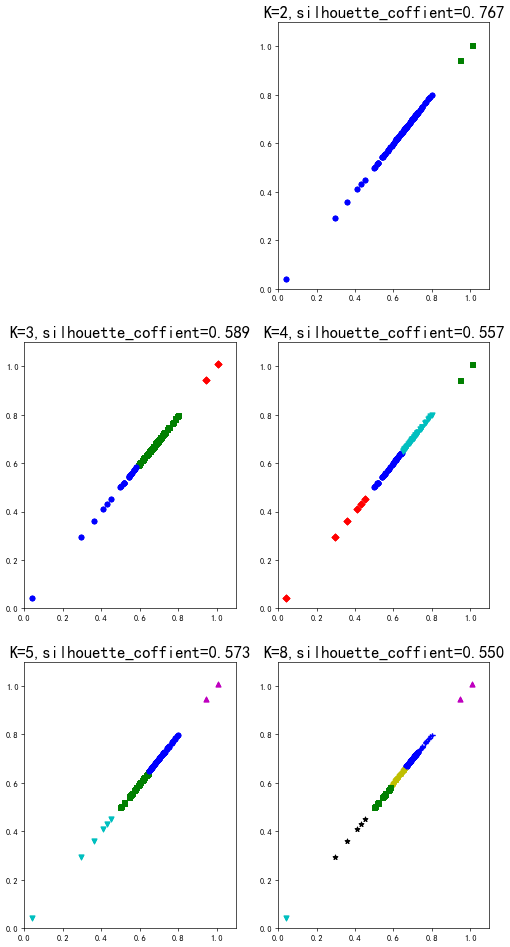

In [286]:
color=['b','g','r','c','m','y','k','b']
markers = ['o','s','D','v','^','p','*','+']
clusters = [2,3,4,5,8]
subplot_counter = 1
sc_scores = []
plt.figure(figsize=(10,20),dpi=60)
for t in clusters:
    subplot_counter += 1
    plt.subplot(3,2,subplot_counter)
    kmeans_model = KMeans(n_clusters=t).fit(X)
    for i,l in enumerate(kmeans_model.labels_):
        plt.scatter(X[i],X[i],color=color[l],marker=markers[l])
        plt.xlim([0,1.1])
        plt.ylim([0,1.1])
        sc_score = silhouette_score(X,kmeans_model.labels_,metric='euclidean')
    sc_scores.append(sc_score)
    plt.title('K=%s,silhouette_coffient=%0.03f'%(t,sc_score),fontsize=20)
plt.plot(clusters,sc_scores,'*-')
plt.show()

In [469]:
#根据kmeans分成五类，把每类的数据取出来
earning_c=[]
kmeans_model_earn = KMeans(5).fit(X)
for i,l in enumerate(kmeans_model_earn.labels_):
    earning_c.append((X[i][0],l))    

In [470]:
earning_c0=[];earning_c1=[];earning_c2=[];earning_c3=[];earning_c4=[];ave_earn1y=[]
earning_c0_d=[];earning_c1_d=[];earning_c2_d=[];earning_c3_d=[];earning_c4_d=[];ave_6m=[];ave_3m=[];ave_35d=[]
for j in arange(len(earning_c)):
    if earning_c[j][1] == 0:
        earning_c0.append((earning_c[j][0],df[df['earn_7d']==earning_c[j][0]].p_code.values[0]))
    elif earning_c[j][1] == 1:
        earning_c1.append((earning_c[j][0],df[df['earn_7d']==earning_c[j][0]].p_code.values[0]))
    elif earning_c[j][1] == 2:
        earning_c2.append((earning_c[j][0],df[df['earn_7d']==earning_c[j][0]].p_code.values[0]))
    elif earning_c[j][1] == 3:
        earning_c3.append((earning_c[j][0],df[df['earn_7d']==earning_c[j][0]].p_code.values[0]))
    else:
        earning_c4.append((earning_c[j][0],df[df['earn_7d']==earning_c[j][0]].p_code.values[0]))
for i in arange(len(earning_c0)):
    earning_c0_d.append(earning_c0[i][0])
for i in arange(len(earning_c1)):
    earning_c1_d.append(earning_c1[i][0])
for i in arange(len(earning_c2)):
    earning_c2_d.append(earning_c2[i][0])
for i in arange(len(earning_c3)):
    earning_c3_d.append(earning_c3[i][0])
for i in arange(len(earning_c4)):
    earning_c4_d.append(earning_c4[i][0])
ave_earn_0 = np.array(earning_c0_d).mean();ave_earn_1 = np.array(earning_c1_d).mean();ave_earn_2 = np.array(earning_c2_d).mean()
ave_earn_3 = np.array(earning_c3_d).mean();ave_earn_4 = np.array(earning_c4_d).mean()
ave_earn7d=[ave_earn_0,ave_earn_1,ave_earn_2,ave_earn_3,ave_earn_4]
ave_earn7d

[2.5333421052631575,
 0.7996666666666666,
 1.8820000000000001,
 2.9104,
 2.246097633136095]

In [471]:
ave_earn1y=[3.2121874999999998,
 1.9925000000000002,
 2.9552941176470586,
 3.6584615384615375,
 3.4097058823529416]
ave_6m=[1.3169696969696971,
 0.745,
 1.5561111111111112,
 1.4196874999999998,
 1.1869230769230767]
ave_3m=[0.6278378378378376,
 0.3633333333333333,
 0.6815384615384616,
 0.5638461538461539,
 0.74]
ave_1m=[0.22675, 0.12, 0.20375, 0.24, 0.06]
earn_35d=[2.88, 1.725, 2.5563076923076924, 1.075, 2.7456410256410253]
earn_28d=[2.8738181818181814, 1.4, 2.4425384615384615, 0.65, 2.7006249999999996]
earn_14d=[2.0375,
 2.586363636363636,
 0.7233333333333333,
 2.357353846153846,
 2.865555555555556]
earn_7d=[2.5333421052631575,
 0.7996666666666666,
 1.8820000000000001,
 2.9104,
 2.246097633136095]

1.2984412857673724
[[0.10956429]]


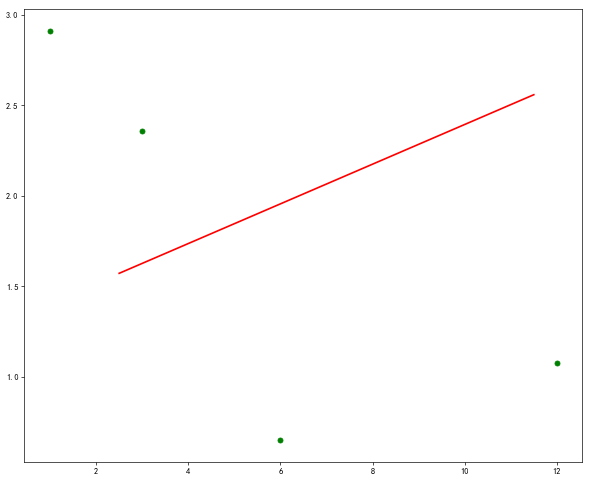

In [537]:
from sklearn.linear_model import LinearRegression,Ridge

month = [1,3,6,12]
plt.figure(figsize=(12,10),dpi=60)
Rireg = Ridge(alpha=0.5)
Rireg.fit(np.array(month).reshape(-1,1),np.array([earn_7d[3],earn_14d[3],earn_28d[3],earn_35d[3]]).reshape(-1,1))
plt.scatter(month,[earn_7d[3],earn_14d[3],earn_28d[3],earn_35d[3]],color='g')
print (linreg.intercept_[0])
print (linreg.coef_)
plt.plot([2.5,11.5],[2.5*linreg.coef_[0] + linreg.intercept_[0], 11.5*linreg.coef_[0] + linreg.intercept_[0]],'r-',linewidth=2)
# plt.xticks(fontsize=14);plt.yticks(fontsize=14)
# plt.title('第二类理财收益预测（天）',fontsize=20)
plt.show()      

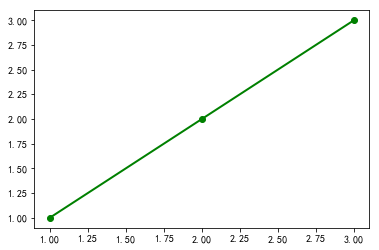

In [494]:
plot([1,2,3], [1,2,3], 'go-', label='line 1', linewidth=2)

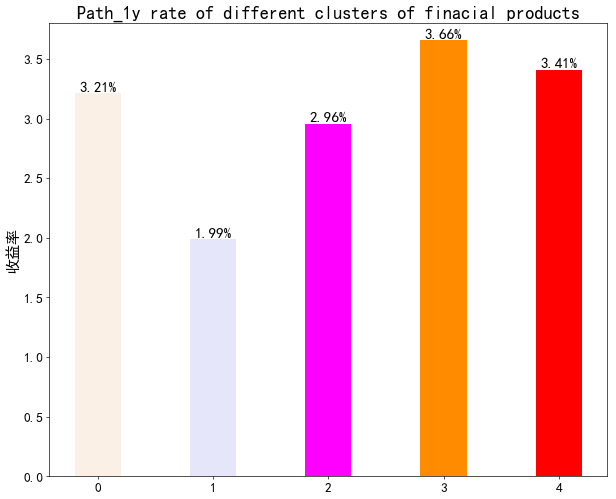

In [436]:
import random
ave_uni = []
all_colors = list(plt.cm.colors.cnames.keys())
for k in ave_earn:
    ave_uni.append(float('%.2f'%k))
random.seed(10)
c = random.choices(all_colors,k=6)
plt.figure(figsize=(12,10),dpi=60)
plt.bar([0,1,2,3,4],ave_earn,color=c,width=.4)
for i,val in enumerate(ave_uni):
    plt.text(i,val,str(val)+'%',horizontalalignment='center',verticalalignment='bottom', fontdict={'fontweight':500, 'size':18})
plt.ylim(0,3.8)
plt.title("Path_1y rate of different clusters of finacial products", fontsize=22)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16);plt.ylabel('收益率',fontsize=18)
plt.show()

In [311]:
dff = df[df['earning']==0.7393].p_code.values[0]
dff

50003

In [124]:
df1_name= df.groupby(df['start_money'] == 5000000).apply(lambda x:x.loc[:,'p_name'])[1]

In [125]:
df1_data=df.groupby(df['start_money'] == 5000000).apply(lambda x:x.loc[:,'earning'])[1]

In [131]:
df1_data_norm=(df1_data-df1_data.mean())/df1_data.std()

In [156]:
df2=df1_data_norm.sort_values()

In [157]:
df2

2    -3.336583e-01
99   -1.231583e-01
86   -8.205833e-02
26   -6.955833e-02
70   -3.115833e-02
24   -2.895833e-02
93   -8.358333e-03
92   -8.158333e-03
7     1.110223e-16
38    6.141667e-03
65    8.141667e-03
98    1.224167e-02
34    6.585417e-01
Name: earning, dtype: float64

In [160]:
df2.index

Int64Index([2, 99, 86, 26, 70, 24, 93, 92, 7, 38, 65, 98, 34], dtype='int64')

In [173]:
n1 = np.arange(13)

In [167]:
df1_name[df2.index]

2      国泰现金管理货币B
99     华商现金增利货币B
86       前海开源货币B
26      东吴增鑫宝货币B
70         国开货币B
24      兴业鑫天盈货币B
93         中欧货币D
92         中欧货币B
7     民生加银腾元宝货币B
38         东吴货币B
65         交银货币B
98      天弘弘运宝货币B
34     北信瑞丰现金添利B
Name: p_name, dtype: object

In [142]:
from pylab import *

### 起买金额为5000000的收益率，分析有几只大于平均收益，有几只低于平均收益

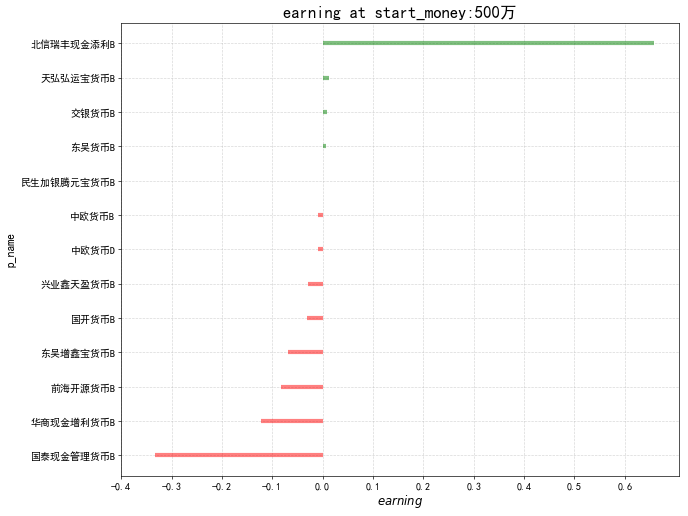

In [220]:
mpl.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus']=False
colors = ['red' if x < 0 else 'green' for x in df2.values]
plt.figure(figsize=(12,10),dpi=60)
plt.hlines(n1,xmin=0,xmax=df2.values,color=colors,alpha=0.5,linewidth=5)
# plt.gca().set(ylabel='$p_name$',xlabel='$earning$')
plt.xlabel('$earning$',fontsize=14)
plt.ylabel('p_name',fontsize=14)
plt.yticks(n1,df1_name[df2.index].values,fontsize=12)
plt.xticks(np.arange(-0.4,0.7,0.1),fontsize=12)
plt.title('earning at start_money:500万', fontdict={'size':20})
plt.grid(linestyle='--',alpha=0.5)
plt.show()

In [201]:
#将起投金额为100元的7日年化率，14日年化率，28日年化率，35日年化率数据挑选出来
df1_data7=df.groupby(df['start_money'] == 100).apply(lambda x:x.loc[:,'earn_7d'])[1]
df1_data14=df.groupby(df['start_money'] == 100).apply(lambda x:x.loc[:,'earn_14d'])[1]
df1_data28=df.groupby(df['start_money'] == 100).apply(lambda x:x.loc[:,'earn_28d'])[1]
df1_data35=df.groupby(df['start_money'] == 100).apply(lambda x:x.loc[:,'earn_35d'])[1]

In [202]:
len(df1_data7)

84

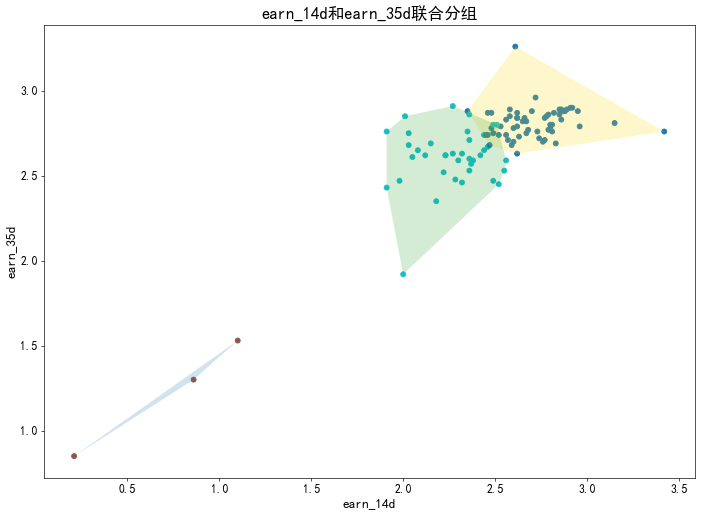

In [257]:
from sklearn.cluster import AgglomerativeClustering
from scipy.spatial import ConvexHull

#Agglomerative clusting
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean',linkage='ward')
cluster.fit_predict(df[['earn_7d','earn_14d','earn_28d','earn_35d']])

#plot
plt.figure(figsize=(14,10),dpi=60)
plt.scatter(df.iloc[:,5],df.iloc[:,7],c=cluster.labels_,cmap='tab10')

#Encircle
def encircle(x,y,ax=None,**kw):
    if not ax:ax=plt.gca()
    p = np.c_[x,y]
    hull = ConvexHull(p)
    poly = plt.Polygon(p[hull.vertices,:],**kw)
    ax.add_patch(poly)

#Draw polygon surrounding vertices
encircle(df.loc[cluster.labels_ == 0,'earn_14d'],df.loc[cluster.labels_ == 0,'earn_35d'],ec="k", fc="gold", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 1,'earn_14d'],df.loc[cluster.labels_ == 1,'earn_35d'],ec="k", fc="tab:blue", alpha=0.2, linewidth=0)
encircle(df.loc[cluster.labels_ == 2,'earn_14d'],df.loc[cluster.labels_ == 2,'earn_35d'],ec="k", fc="tab:green", alpha=0.2, linewidth=0)
# encircle(df.loc[cluster.labels_ == 3,'earn_7d'],df.loc[cluster.labels_ == 3,'earn_28d'])
# encircle(df.loc[cluster.labels_ == 4,'earn_7d'],df.loc[cluster.labels_ == 4,'earn_28d'])
plt.xlabel('earn_14d',fontsize=16);plt.xticks(fontsize=14)
plt.ylabel('earn_35d',fontsize=16);plt.yticks(fontsize=14)
plt.title("earn_14d和earn_35d联合分组",fontsize=20)
plt.show()

In [261]:
df1_3m_100 = df.groupby(df['start_money'] == 100).apply(lambda x:x.loc[:,'path_3m'])[1]
df1_3m_100 = df1_3m_100 * 100
df1_3m_500 = df.groupby(df['start_money'] == 5000000).apply(lambda x:x.loc[:,'path_3m'])[1]
df1_3m_500 = df1_3m_500 * 100

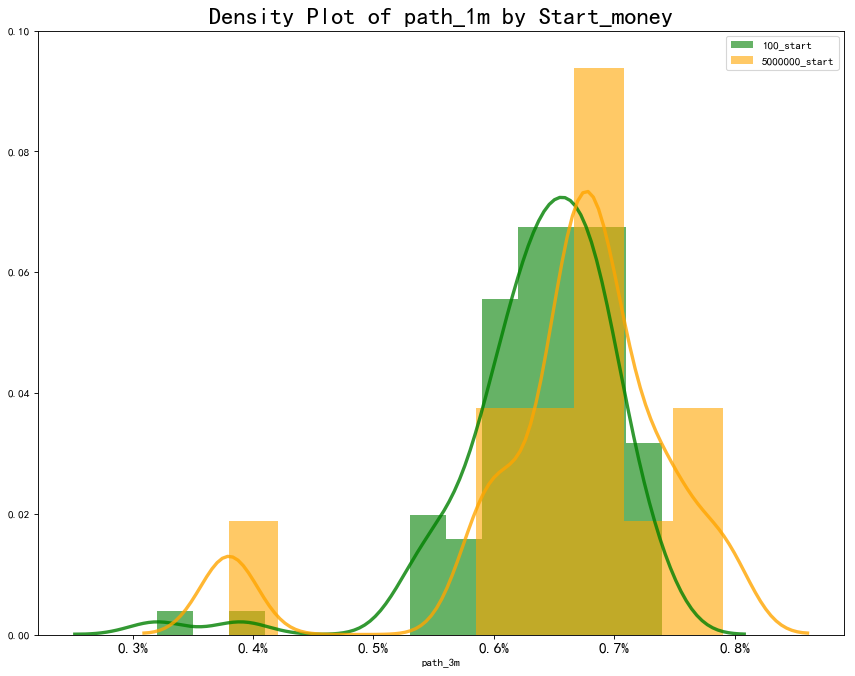

In [284]:
#直方密度线图
import seaborn as sns
plt.figure(figsize=(13,10), dpi=80)
sns.distplot(df1_3m_100,color='green',label='100_start',hist_kws={'alpha':.6},kde_kws={'linewidth':3,'alpha':.8})
# sns.distplot(df.loc[df['start_money'] == 1000,'path_3m'],color='orange',label='1000_start',hist_kws={'alpha':.7},kde_kws={'linewidth':3})
sns.distplot(df1_3m_500,color='orange',label='5000000_start',hist_kws={'alpha':.6},kde_kws={'linewidth':3,'alpha':.8})
plt.yticks(np.arange(0,0.12,0.02))

# Decoration
plt.title('Density Plot of path_1m by Start_money', fontsize=22)
plt.legend()
plt.xticks(np.arange(30,90,10),['0.3%','0.4%','0.5%','0.6%','0.7%','0.8%'],fontsize=14)
plt.show()

In [246]:
df.loc[df['start_money'] == 1000,'path_3m'].size

3